<a href="https://colab.research.google.com/github/matsunagalab/lecture_OR/blob/main/solver02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ソルバ2: PuLPで応用問題を解く

前回と同じように左上の「ファイル」メニューから「ドライブにコピーを保存」して始めてください。

今回は、応用問題である生産計画問題と輸送問題をPuLPで解きます。応用問題は条件が複雑になることが多いので、整理して扱えるように途中でPythonの文法を追加解説します。

## PuLPのインストール

前回同様、まずPuLPをインストールします。

In [ ]:
!pip install pulp

インストールが成功したか確認するために、pythonでPuLPパッケージをimportしてみます。なにも出力されなければ成功です。

In [ ]:
# PuLPをロードする
from pulp import *

## 前回の復習: 練習問題3

---



以下の標準形をPuLPで解いてみましょう

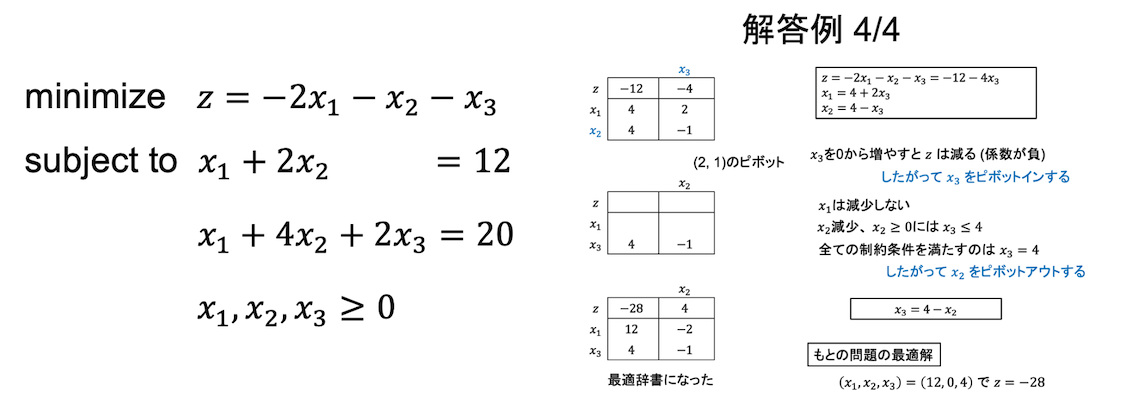

In [ ]:
problem = LpProblem('Problem_Name', LpMinimize)

x1 = LpVariable('x1', 0, None, LpContinuous)
x2 = LpVariable('x2', 0, None, LpContinuous)
x3 = LpVariable('x3', 0, None, LpContinuous)

problem += - 2 * x1 - x2 - x3
problem += x1 + 2*x2 == 12.0
problem += x1 + 4*x2 + 2*x3 == 20.0

print()
print("-" * 10)
print(problem)

problem.solve()

print()
print("-" * 10)
print('Status:', LpStatus[problem.status])

for v in problem.variables():
    print(v.name, '=', v.varValue)

print('The optimum value is ', value(problem.objective))

## 練習問題1: 生産計画問題

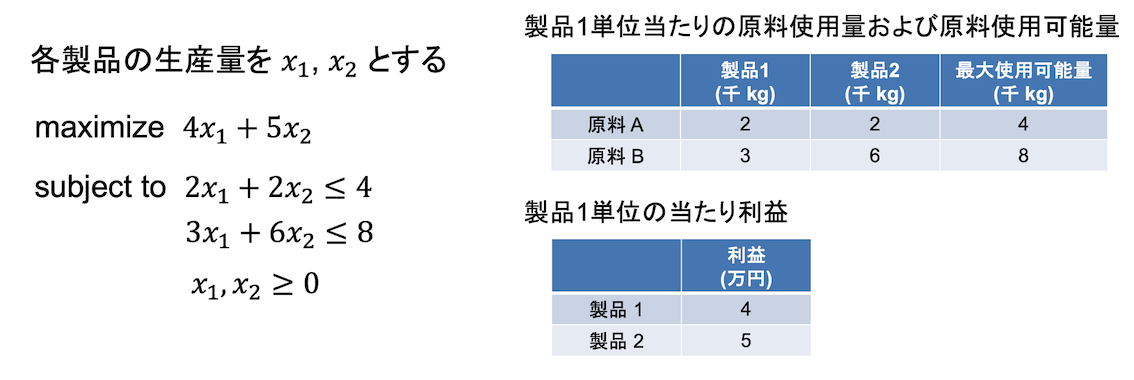

In [ ]:
# ここにコードを書いて実行

## Python文法の追加解説

輸送問題ではもう少し扱うパラメータが多くなるので、それを表現するための文法を追加で学びます。扱うパラメータが多くなってくると、それらをまとまりにして処理できるようになると便利です。そのためのデータ構造を実現するものとして前回「リスト」を学びました。まずリストを復習します。

リストは \[\] の中で、カンマで区切って表現します。例えば、

In [ ]:
A = [1, 2, 3]

数字以外の様々な型を要素に持つことができます。

In [ ]:
B = ["a", 1, "b"]

リストの要素を取り出すには、\[\] の中で０からはじまるインデックスを指定します

In [ ]:
B[0]

forループを使うとリストの要素に順番にアクセスすることができます

In [ ]:
for a in B:
    print(a) #要素ごとに処理したい命令

range型を用いてループ回すこともできます

In [ ]:
range(3)

In [ ]:
list(range(3))

In [ ]:
for i in range(3):
    print(B[i])

二重のリストを作ることもできます

In [ ]:
C = [[1, 2, 3], ["a", "b", "c"]]

二重のリストの要素へは以下のようにアクセスします

In [ ]:
C[0][2]

また、forループで要素にアクセスすることができます

In [ ]:
for i in range(2):
    for j in range(3):
        print(C[i][j])

リストに要素を追加するにはappendを使います

In [ ]:
A = [1, 2, 3]
A.append(100)
A

ループでリストを作るには以下の「リスト内包表記」が便利です

In [ ]:
A = [i**3 for i in range(4)]
A

In [ ]:
B = [i+j for i in range(2) for j in range(3)]
B

Pythonは文字列も扱えます

In [ ]:
'x1'

文字列は + 演算子で結合できます

In [ ]:
'x' + '1'

数値はstr()関数で文字列へ変換できます

In [ ]:
str(1)

これまでのことを組み合わせると数値から `x1` という文字列を作れます

In [ ]:
i = 1
'x' + str(i)

## 輸送問題を解く

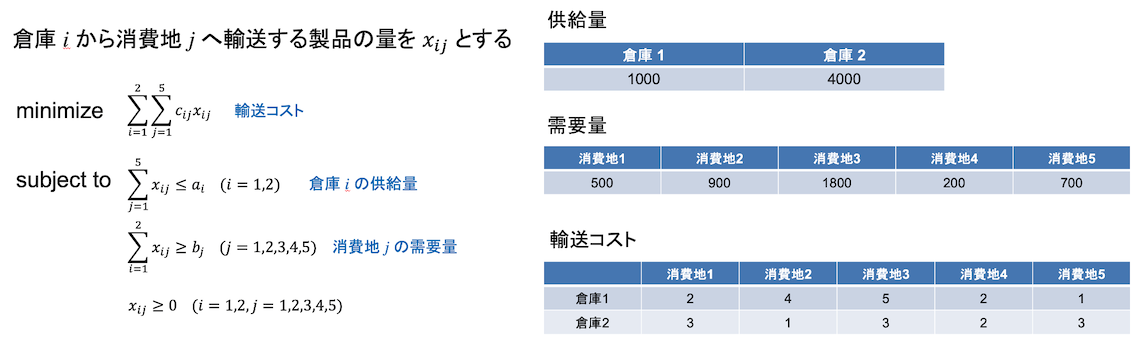

In [ ]:
I_COUNT = 2
supply = [1000, 4000]

J_COUNT = 5
demand = [500, 900, 1800, 200, 700]

costs = [#cities
         #j=0  1  2  3  4
           [2, 4, 5, 2, 1],#i=0   warehouses
           [3, 1, 3, 2, 3] #i=1
         ]

problem = LpProblem("輸送問題", LpMinimize)

vars = []
for i in range(I_COUNT):
  v = []
  for j in range(J_COUNT):
    v.append(LpVariable("x_"+str(i)+"_"+str(j), 0, None, LpContinuous))
  vars.append(v)

problem += lpSum([vars[i][j]*costs[i][j] for i in range(I_COUNT) for j in range(J_COUNT)])

for i in range(I_COUNT):
    problem += lpSum([vars[i][j] for j in range(J_COUNT)]) <= supply[i]

for j in range(J_COUNT):
    problem += lpSum([vars[i][j] for i in range(I_COUNT)]) >= demand[j]

print()
print("-" * 10)
print(problem)

problem.solve()

print()
print("-" * 10)
print('Status:', LpStatus[problem.status])
for v in problem.variables():
    print(v.name, '=', v.varValue)
print('The optimum value is ', value(problem.objective))


## 発展的な例：輸送問題を可視化する

In [ ]:
# Install required library
!pip install pulp

# Import libraries
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # For colormaps

# --- 1. Generate a random problem ---

# Number of supply locations (Warehouses)
M = 5
# Number of demand locations (Cities)
N = 10

# Fix the random seed (for reproducibility)
np.random.seed(42)

# Generate 2D coordinates (range 0 to 100)
s_coords = np.random.rand(M, 2) * 100
d_coords = np.random.rand(N, 2) * 100

# Generate supply (s) and demand (d) (range 10 to 50)
s = np.random.randint(10, 51, M)
d = np.random.randint(10, 51, N)

# --- Balance total supply and demand ---
total_s = np.sum(s)
total_d = np.sum(d)

if total_s > total_d:
    # If supply > demand, increase demand proportionally
    d = (d * (total_s / total_d)).astype(int)
    d[-1] += total_s - np.sum(d) # Add remainder to the last one
else:
    # If demand > supply, increase supply proportionally
    s = (s * (total_d / total_s)).astype(int)
    s[-1] += total_d - np.sum(s) # Add remainder to the last one

print(f"Total Supply: {np.sum(s)}")
print(f"Total Demand: {np.sum(d)}")
print("-" * 30)

# --- 2. Calculate Cost Matrix (Euclidean Distance) ---

# Initialize M x N cost matrix c
c = np.zeros((M, N))

for i in range(M):
    for j in range(N):
        # Calculate Euclidean distance
        dist = np.sqrt(
            (s_coords[i, 0] - d_coords[j, 0])**2 + \
            (s_coords[i, 1] - d_coords[j, 1])**2
        )
        c[i, j] = dist

# --- 3. Model and Solve with PuLP ---

# 1. Define the problem (Minimization)
prob = LpProblem("Random_Transport_Problem", LpMinimize)

# 2. Define variables (transport amount x_ij)
# (i: supply, j: demand)
x = LpVariable.dicts("x", (range(M), range(N)), lowBound=0, cat='Continuous')

# 3. Objective function (Total Transport Cost)
prob += lpSum(x[i][j] * c[i, j] for i in range(M) for j in range(N)), "TotalCost"

# 4. Constraints
# 4-1. Supply constraint (outflow from each supply location <= supply)
for i in range(M):
    prob += lpSum(x[i][j] for j in range(N)) <= s[i], f"Supply_{i}"

# 4-2. Demand constraint (inflow to each demand location >= demand)
# (Can be == since total supply equals total demand)
for j in range(N):
    prob += lpSum(x[i][j] for i in range(M)) >= d[j], f"Demand_{j}"

# 5. Solve the problem
prob.solve()

# --- 4. Display Results ---
print(f"Status: {LpStatus[prob.status]}")
if LpStatus[prob.status] == "Optimal":
    print(f"Minimum Total Cost: {value(prob.objective):.4f}")

    # Extract routes with transport amount > 0
    routes_sol = []
    for i in range(M):
        for j in range(N):
            amount = x[i][j].varValue
            if amount > 1e-6: # Ignore very small amounts
                routes_sol.append((i, j, amount))
else:
    print("Optimal solution not found.")
    routes_sol = []

# --- 5. 2D Visualization ---

plt.figure(figsize=(12, 8))

# Plot supply locations (Warehouses) as blue circles
# Size proportional to supply (s)
plt.scatter(
    s_coords[:, 0],
    s_coords[:, 1],
    s=s * 5,  # Adjust size
    c='blue',
    label='Warehouses', # Updated label
    alpha=0.7,
    edgecolors='k'
)

# Plot demand locations (Cities) as red squares
# Size proportional to demand (d)
plt.scatter(
    d_coords[:, 0],
    d_coords[:, 1],
    s=d * 5,  # Adjust size
    c='red',
    marker='s',
    label='Cities', # Updated label
    alpha=0.7,
    edgecolors='k'
)

# Draw the optimal routes
max_amount = 1e-6 # Initialize to a small number
if routes_sol:
    # Used to normalize line width/color
    max_amount = max(amount for _, _, amount in routes_sol)

    # Prepare colormap (low amount -> blue, high amount -> yellow)
    norm = plt.Normalize(vmin=0, vmax=max_amount)
    cmap = cm.get_cmap('viridis')

    print("\n--- Optimal Routes (Warehouse Idx, City Idx, Amount) ---") # Updated print
    for i, j, amount in routes_sol:
        print(f"({i}, {j}, {amount:.2f})")

        # Draw the route as a line
        plt.plot(
            [s_coords[i, 0], d_coords[j, 0]],
            [s_coords[i, 1], d_coords[j, 1]],
            c=cmap(norm(amount)),      # Color based on amount
            linewidth=amount / max_amount * 5, # Line width based on amount (max 5)
            alpha=0.6                   # Alpha (transparency)
        )

# Graph decoration
plt.title("Transportation Problem Visualization (Cost = Euclidean Distance)", fontsize=16)
plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Add colorbar (legend for transport amount)
# Create a dummy ScalarMappable to use for the colorbar
norm_cb = plt.Normalize(vmin=0, vmax=max_amount)
sm = plt.cm.ScalarMappable(cmap=cm.get_cmap('viridis'), norm=norm_cb)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Transport Amount', fontsize=12)

plt.show()

## 小レポート課題: 施設配置問題

2つの工場（$i=0, 1$）と、3つの消費地（$j=0, 1, 2$）がある。
「工場の稼働計画」と「輸送計画」を最適化し、総コスト（工場経費＋輸送コスト）を最小化せよ。

**コードと実行結果(最適解と最適値)を貼ってPDFで提出すること**.
**締切は次回講義前日の20時.**

\
**決定変数**:

$x_{ij}$: 工場 $i$ から 消費地 $j$ への輸送量（実数: LpContinuous）

$y_i$: 工場 $i$ を稼働させるか（0か1: LpBinary）

\
**目的関数 (Minimize)**:

$\sum_{i} \sum_{j} c_{ij} x_{ij} + \sum_{i} d_{i} y_{i}$
（総輸送コスト ＋ 総工場経費）

\
**制約条件**:

$\sum_{i} x_{ij} \ge b_j$ （各消費地 $j$ について）

$\sum_{j} x_{ij} \le a_i \times y_i$ （各工場 $i$ について）

\
工場（$i$）:
0, 1  (インデックス)
`I_COUNT = 2` (工場の数)

\
供給能力 $a_i$:
`supply = [2000, 1200]`
`supply[0]` が工場0の能力, `supply[1]` が工場1の能力

\
工場経費 $d_i$:
`fixed_costs = [50000, 40000]`
`fixed_costs[0]` が工場0の経費

\
消費地（$j$）:
0, 1, 2 (インデックス)
`J_COUNT = 3` (消費地の数)
需要量 $b_j$: `demand = [800, 600, 500]`
`demand[0]` が消費地0の需要

\
輸送コスト $c_{ij}$ （リストのリスト）:
```
trans_costs = [[5, 10, 15],  # 工場 0 から 消費地 0, 1, 2 へのコスト
               [12, 8,  4]]  # 工場 1 から 消費地 0, 1, 2 へのコスト
```
`trans_costs[0][1]` は $c_{01}$ (工場0 -> 消費地1) のコストが10であることを示す。


In [ ]:
!pip install pulp
from pulp import *

In [ ]:
# ここにコード